# 데이터 전처리 (Data Processing) 

- 데이터 분석에 적합하게 데이터를 가공하는 작업  




### 데이터 전처리 종류 

- 데이터 클리닝 - 결측치 처리, 잘못된 값 처리
- 스케일링 - 변수들의 값의 범위를 동일하게 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

## 데이터 클리닝

###  결측치 및 잘못된 값 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시 : not a number)
- 결측치 처리 방법 세 가지
  - 삭제 :결측치가 포함된 샘플(행) 삭제 : dropna()  
  - 대체 : 결측치를 적절한 값으로 대체 : fillna()  
  - 그대로 둠 : 다음 분석 단계로 넘겨서 처리 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import seaborn as sns

## 실습 데이터
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

In [4]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,171.12,66.05
1,168.68,59.70
2,175.00,58.85
3,179.28,64.00
4,174.76,73.65


In [5]:
df = df_raw.copy()

<Axes: ylabel='Count'>

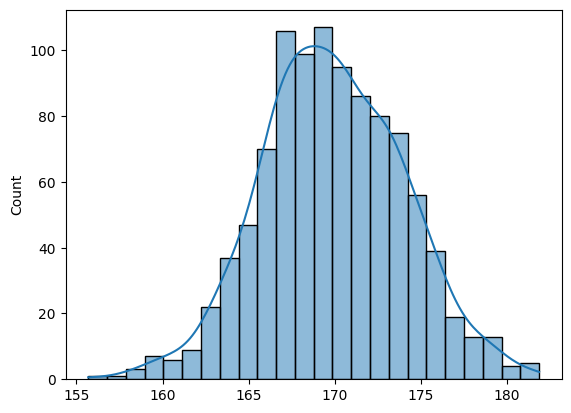

In [6]:
# 데이터 분포 확인
sns.histplot(df.height.values, kde=True)

## 결측치 처리 

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [7]:
df[:5]

,height,weight
0,171.12,66.05
1,168.68,59.70
2,175.00,58.85
3,179.28,64.00
4,174.76,73.65


In [8]:
df['weight'][2] = np.nan
df[:5]

,height,weight
0,171.12,66.05
1,168.68,59.70
2,175.00,NaN
3,179.28,64.00
4,174.76,73.65


In [9]:
df.isnull().sum()

height    0
weight    1
dtype: int64

In [10]:
df.shape

(1000, 2)

In [11]:
# 결측치 있는 행 삭제
df2 = df.dropna()
df2.shape
df2[:5]

(999, 2)

,height,weight
0,171.12,66.05
1,168.68,59.70
3,179.28,64.00
4,174.76,73.65
5,166.44,61.75


In [12]:
# 결측치를 다른 값으로 대체
# 몸무게의 결측치를 평균치로 대체하는 것이 일반적
df3 = df.fillna(df['weight'].mean())
df3.shape
df3[:5]

df['weight'].mean()
# 키나 몸무게는 함부로 0으로 대체 안 함 (키나 몸무게가 0일 상황은 없음)

(1000, 2)

,height,weight
0,171.12,66.050000
1,168.68,59.700000
2,175.00,65.111011
3,179.28,64.000000
4,174.76,73.650000


65.111011011011

In [13]:
# 결측치를 바로 이전 값으로 대체 : forward fill / backword fill
# method='ffill' / 'bfill'
df.fillna(method='ffill')[:5]

,height,weight
0,171.12,66.05
1,168.68,59.70
2,175.00,59.70
3,179.28,64.00
4,174.76,73.65


#### 주택가격 데이터에서 결측치 처리 

In [14]:
data = pd.read_csv("../data/house_price.csv")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [24]:
# 노트 15 탐색적 데이터 분석에서 했음

## 스케일링 
- 데이터의 값의 범위를 조정하는것  
- 표준 스케일링 : 표준화
  - 각 칼럼의 평균을 0, 분산이 1이 되도록 스케일링 
  - 데이터의  분포 형태는 그대로 유지하면서 평균을 0, 표준편차를 1로 환산하는 것일 뿐
  - 평균과 표준편차를 구하고, 모든 데이터마다 평균을 빼서 표준편차로 나누는 연산
- Min-max 스케일링
  - 데이터가 0과 1 사이에 위치하도록 스케일링 
  - 최소값 0, 최대값 1이 됨
  - 데이터의 최소값과 최대값을 알고 있을 때 사용  

일반적으로 연속형 수치는 스케일링 작업 수행

- 숫자가 상대적이기 때문에 스케일링을 해서 문제가 되지는 않지만
- 스케일링을 하지 않을 경우 문제 발생
    - 예 : 변수1은 1000점 만점이고, 변수2는 10점 만점일 경우
        - 변수2는 결과에 어떤 영향도 미치지 못함
        - 인공지능 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만,
        - 선형모델, 신경망 모델 등에서는 스케일링 작업을 수행

#### 표준 스케일링
- sklearn.preprocessing의 StandardScaler 클래스 사용
    - fit() / transform()
    - fit_transform() 사용

In [21]:
# 키와 몸무게 데이터를 각 표준 스케일링한 후 컬럼에 추가


from sklearn.preprocessing import StandardScaler

df = df_raw.copy()
scaler = StandardScaler() # StandardScaler 클래스의 객체 생성
df[['height_sc', 'weight_sc']] = scaler.fit_transform(df[['height', 'weight']])
# 객체.메소드()

df[:5]

,height,weight,height_sc,weight_sc
0,171.12,66.05,0.302258,0.191431
1,168.68,59.70,-0.289416,-1.094563
2,175.00,58.85,1.243115,-1.266704
3,179.28,64.00,2.280968,-0.223733
4,174.76,73.65,1.184918,1.730573


### 스케일링 이전의 원래 값으로 환원하는 방법
- inverse_transform을 사용한다

In [22]:
df[:5]
# 원본height 원본weight 변환된height 변환된weight

,height,weight,height_sc,weight_sc
0,171.12,66.05,0.302258,0.191431
1,168.68,59.70,-0.289416,-1.094563
2,175.00,58.85,1.243115,-1.266704
3,179.28,64.00,2.280968,-0.223733
4,174.76,73.65,1.184918,1.730573


In [23]:
# 원래 값으로 환원 : inverse_transform()
# 환원 : 스케일링 변환된 값을 스케일링하기 전의 값으로 되돌리는 것
# 원래 값 : 165.72
# -> 스케일링 변환된 값 : -1.083048
# -> 환원 : 165.72 (원래 값으로 돌아감)
scaler.inverse_transform(df[['height_sc', 'height_sc']])[:5]

array([[171.12      ,  66.59724297],
       [168.68      ,  63.67566954],
       [175.        ,  71.24302367],
       [179.28      ,  76.36775083],
       [174.76      ,  70.95565579]])

### 데이터 분포 확인

<Axes: ylabel='Density'>

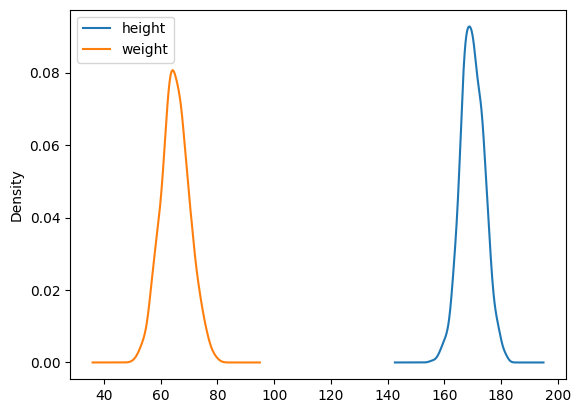

In [24]:
# 스케일링 하기 전
df[['height', 'weight']].plot.kde()

<Axes: ylabel='Density'>

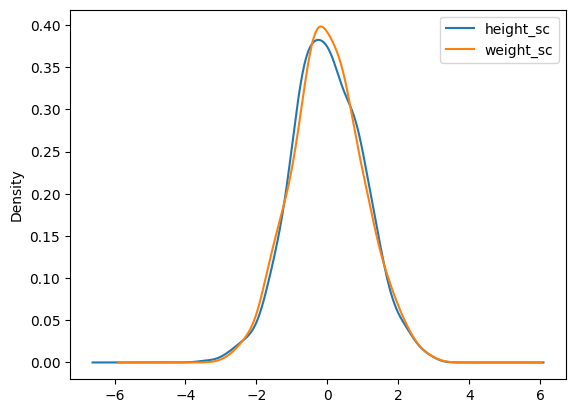

In [25]:
# 스케일링 후
df[['height_sc', 'weight_sc']].plot.kde()

## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df[['height_minmax', 'weight_minmax']] = minmax_scaler.fit_transform(df[['height', 'weight']])
df[:5]

,height,weight,height_sc,weight_sc,height_minmax,weight_minmax
0,171.12,66.05,0.302258,0.191431,0.589313,0.520339
1,168.68,59.70,-0.289416,-1.094563,0.496183,0.305085
2,175.00,58.85,1.243115,-1.266704,0.737405,0.276271
3,179.28,64.00,2.280968,-0.223733,0.900763,0.450847
4,174.76,73.65,1.184918,1.730573,0.728244,0.777966


<Axes: ylabel='Density'>

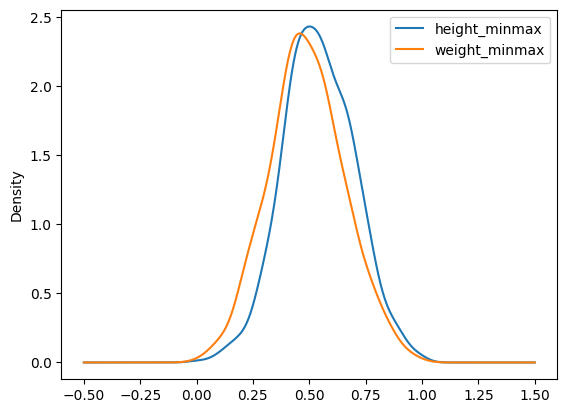

In [28]:
# min-max 스케일링 된 후 그래프
df[['height_minmax', 'weight_minmax']].plot.kde()

In [ ]:
# 표준 스케일링과 Min-max 스케일링 변환 결과
# 변환 결과 차이가 많이 나지 않지만
# 이상치가 있을 때는 두 스케일링 결과 값의 차이가 크게 다름

In [29]:
# 이상치가 포함된 키 데이터 생성 : height_2
df['height_2'] = df['height']
df[:5]

,height,weight,height_sc,weight_sc,height_minmax,weight_minmax,height_2
0,171.12,66.05,0.302258,0.191431,0.589313,0.520339,171.12
1,168.68,59.70,-0.289416,-1.094563,0.496183,0.305085,168.68
2,175.00,58.85,1.243115,-1.266704,0.737405,0.276271,175.00
3,179.28,64.00,2.280968,-0.223733,0.900763,0.450847,179.28
4,174.76,73.65,1.184918,1.730573,0.728244,0.777966,174.76


In [31]:
df['height_2'][0] = 200
df[:5]

,height,weight,height_sc,weight_sc,height_minmax,weight_minmax,height_2
0,171.12,66.05,0.302258,0.191431,0.589313,0.520339,200.00
1,168.68,59.70,-0.289416,-1.094563,0.496183,0.305085,168.68
2,175.00,58.85,1.243115,-1.266704,0.737405,0.276271,175.00
3,179.28,64.00,2.280968,-0.223733,0.900763,0.450847,179.28
4,174.76,73.65,1.184918,1.730573,0.728244,0.777966,174.76


In [32]:
# 이상치가 포함된 height_2에 표준 스케일링 적용하고 컬럼 추가

df['height_2_sc'] = scaler.fit_transform(df[['height_2']])
df[:3]

,height,weight,height_sc,weight_sc,height_minmax,weight_minmax,height_2,height_2_sc
0,171.12,66.05,0.302258,0.191431,0.589313,0.520339,200.00,7.111527
1,168.68,59.70,-0.289416,-1.094563,0.496183,0.305085,168.68,-0.288831
2,175.00,58.85,1.243115,-1.266704,0.737405,0.276271,175.00,1.204472


<Axes: ylabel='Density'>

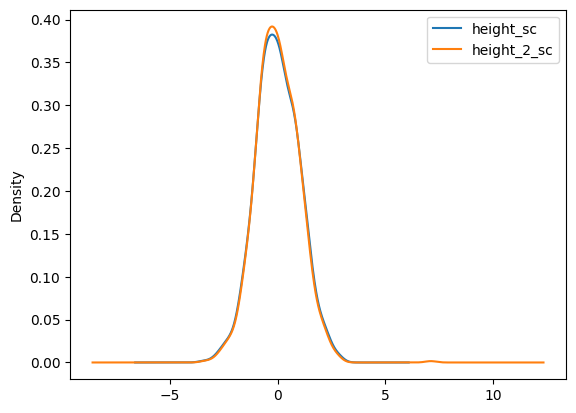

In [33]:
# 이상치가 있는 컬럼과 이상치가 없는 컬럼 비교 (스케일링 변환된 값으로 비교)
df[['height_sc', 'height_2_sc']].plot.kde()
# 분포는 차이가 나지 않음
# 1개의 샘플을 변경했으므로 전체 스케일링에는 큰 영향이 없음

In [37]:
# 이상치가 있는 데이터에 Min-max 스케일링 적용
df['height_2_minmax'] = minmax_scaler.fit_transform(df[['height_2']])
df[:3]
# 200 값이 최대값으로 1이 됨

,height,weight,height_sc,weight_sc,height_minmax,weight_minmax,height_2,height_2_sc,height_2_minmax
0,171.12,66.05,0.302258,0.191431,0.589313,0.520339,200.00,7.111527,1.000000
1,168.68,59.70,-0.289416,-1.094563,0.496183,0.305085,168.68,-0.288831,0.293321
2,175.00,58.85,1.243115,-1.266704,0.737405,0.276271,175.00,1.204472,0.435921


<Axes: ylabel='Density'>

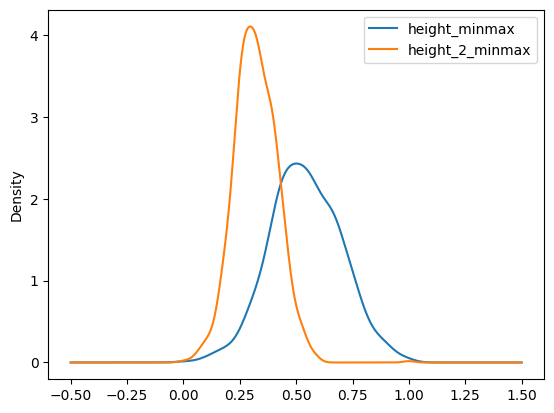

In [38]:
# 이상치가 포함되어 있는 값을 Min-max 스케일링 한 후 분포 확인
df[['height_minmax', 'height_2_minmax']].plot.kde()

# 정상값과 이상치 포함값의 분포 확인 결과
# 분포 차이가 발생
# 이상치가 포함되어 있으면 Min-max의 경우에는 결과값이 달라질 수 있다는 점 고려

In [ ]:
# 결과
# 이상치 데이터가 일부 포함되어 있는 경우
# 표준 스케일링 변환할 경우에는 변환전이나 후의 데이터 분포에 큰 영향이 없지만
# Min-max 스케일링 변환할 경우에는 변환전이나 변환 후 데이터 분포에 영향을 미친다.

### 이상치 처리  
- 이상치 확인 목적
  1. 이상치를 제거하여 데이터 분석의 정확도를 높이는 것
  2. 이상치를 찾는 것  (outlier detection)
     - 신용카드 사용 데이터 분석 시 특이한 구매를 찾는 경우
     - 주문 내역 데이터 분석 시 구매 금액이 월등히 높은 경우  
     - 기기 등 작동 데이터 분석 시 이상을 찾는 경우 

In [62]:
# 이상치 처리 방법
# (1) 로그 변환을 수행하여 수치를 줄여서 정상 데이터 범주에 포함시키는 방법
# (2) 이상치 제거 방법

<Axes: >

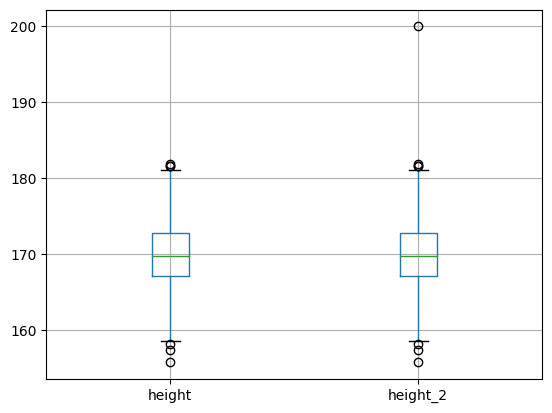

In [40]:
# 스케일링 하기 전의 몸무게와 키 값으로 boxplot() 그리고 이상치 확인
# 이상치가 없는 경우와 있는 경우의 box plot 확인
df[['height', 'height_2']].boxplot()

<Axes: >

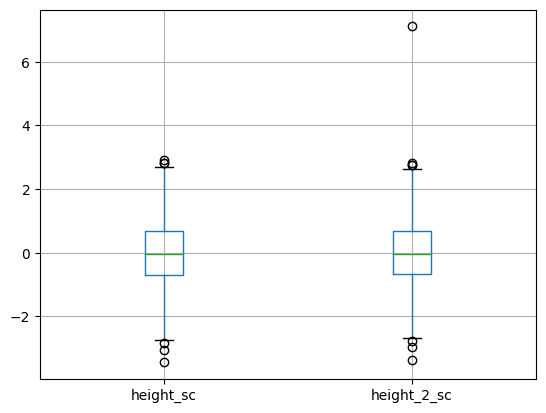

In [41]:
# 스케일링 한 후의 몸무게와 키 값으로 boxplot() 그리고 이상치 확인
df[['height_sc', 'height_2_sc']].boxplot()
# 키 200(2m) 인 사람은 시그마6 밖에 존재 : 이상치로 확인

#### 주택 가격 데이터에서 이상치 처리

In [42]:
# 주택 가격 데이터에서 이상치 처리
# 주택가격 데이터 
# data = pd.read_csv("../data/house_price.csv")
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [43]:
house_df = data.copy()

<Axes: xlabel='SalePrice', ylabel='Density'>

755000

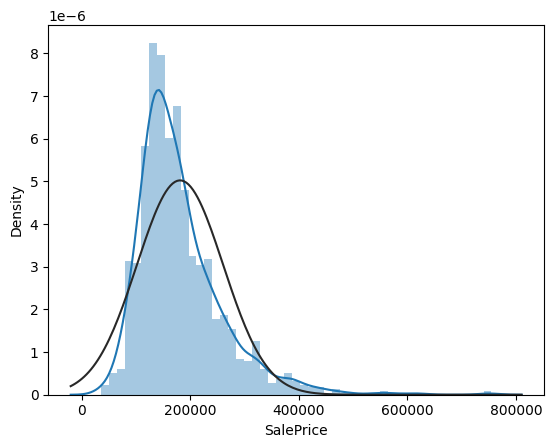

In [45]:
# 주택 가격 데이터를 distplot()으로 그려서 이상치 확인
from scipy import stats

sns.distplot(house_df['SalePrice'], fit=stats.norm)

house_df['SalePrice'].max()

In [46]:
# 주택 가격에 표준 스케일링 적용 후
# 'SalePrice_sc' 열로 추가
house_df['SalePrice_sc'] = scaler.fit_transform(house_df[['SalePrice']])
house_df[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.347273
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.007288
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.536154


In [48]:
# 스케일링 한 주택 가격으로 상위 10 추출
house_df.sort_values(by='SalePrice_sc', ascending=False)['SalePrice_sc'][:10]

691     7.228819
1182    7.102899
1169    5.591855
898     5.423840
803     5.062146
1046    4.730321
440     4.710413
769     4.496348
178     4.040982
798     3.828970
Name: SalePrice_sc, dtype: float64

In [49]:
# 스케일링 한 주택 가격으로 하위 10 추출
house_df.sort_values(by='SalePrice_sc', ascending=False)['SalePrice_sc'][-10:]

812    -1.573100
1325   -1.585604
705    -1.585604
1337   -1.617084
710    -1.623380
30     -1.774484
533    -1.783299
968    -1.800928
916    -1.833528
495    -1.838704
Name: SalePrice_sc, dtype: float64

<Axes: ylabel='SalePrice_sc'>

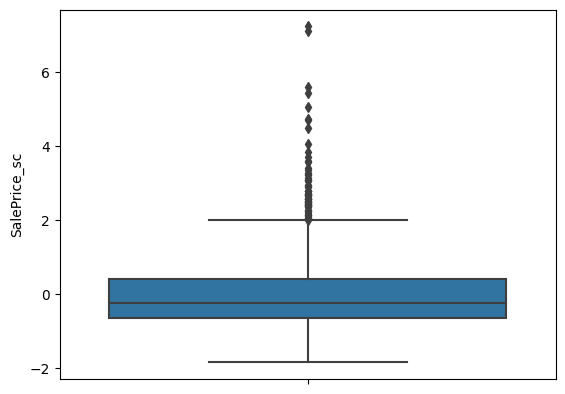

In [50]:
# 스케일링한 주택 가격으로 boxplot() 그려서 확인
sns.boxplot(y=house_df['SalePrice_sc'])

In [ ]:
# 이상치 2개 확인
# 691     7.228819
# 1182    7.102899

In [ ]:
# 이상치 확인 후
# 주택 가격에 로그 변환 수행 후 표준 스케일링 적용 후 확인

<Axes: xlabel='SalePrice', ylabel='Density'>

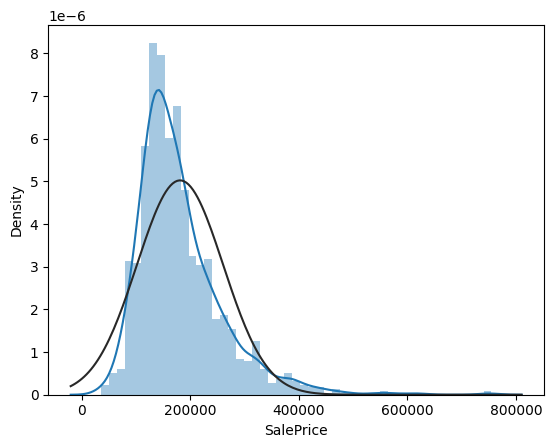

In [51]:
# 로그 변환 전 주택 가격
sns.distplot(house_df['SalePrice'], fit=stats.norm)

<Axes: xlabel='SalePrice_log', ylabel='Density'>

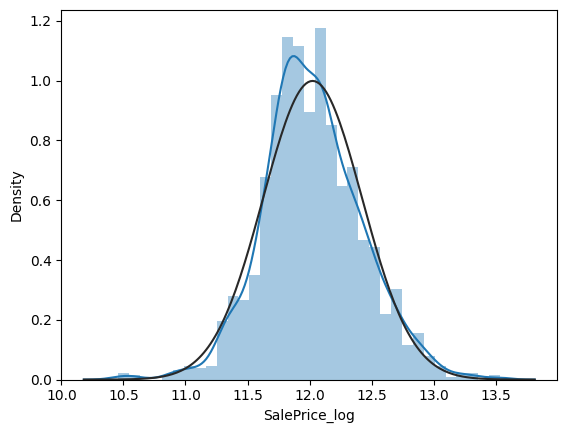

In [52]:
# 로그 변환 후 확인
# 반드시 로그 변환을 해야하는 것은 아니지만
# 정규 분포에 가까우면 예측하기가 수월하기 때문에 로그변환 수행

# SalePrice를 로그변환 후 'SalePrice_log' 컬럼으로 추가
house_df['SalePrice_log'] = np.log1p(house_df['SalePrice'])
sns.distplot(house_df['SalePrice_log'], fit=stats.norm)

In [53]:
house_df[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc,SalePrice_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,0.347273,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,0.007288,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,0.536154,12.317171


In [55]:
# 원래 주택 가격을 로그 변환 후 스케일링 수행
house_df['SalePrice_log_sc'] = scaler.fit_transform(house_df[['SalePrice_log']])
house_df[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc,SalePrice_log,SalePrice_log_sc
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0.347273,12.247699,0.560067
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0.007288,12.109016,0.212763
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0.536154,12.317171,0.734046


In [56]:
# SalePrice_log_sc 값으로 상위 10 확인
house_df.sort_values(by='SalePrice_log_sc', ascending=False)['SalePrice_log_sc'][:10]

691     3.782544
1182    3.749153
1169    3.309316
898     3.255273
803     3.134818
1046    3.018970
440     3.011846
769     2.933939
178     2.759682
798     2.674219
Name: SalePrice_log_sc, dtype: float64

In [57]:
# SalePrice_log_sc 값으로 하위 10 확인
house_df.sort_values(by='SalePrice_log_sc', ascending=False)['SalePrice_log_sc'][-10:]

812    -2.732340
1325   -2.777150
705    -2.777150
1337   -2.893649
710    -2.917613
30     -3.574638
533    -3.618851
968    -3.709688
916    -3.886879
495    -3.916198
Name: SalePrice_log_sc, dtype: float64

<Axes: ylabel='SalePrice_log_sc'>

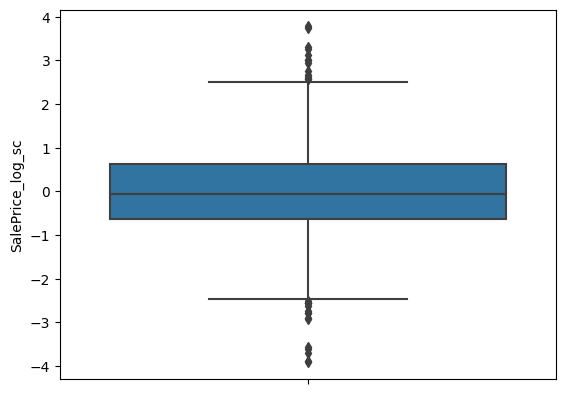

In [59]:
# 로그 변환 후 주택가격을 distplot()으로 확인
sns.boxplot(y=house_df['SalePrice_log_sc'])
# 결론 : boxplot으로 보니 위의 2개 값이 크게 차이나지 않는다.

In [ ]:
# 주택 가격에서 2개의 큰 값 이상치 확인
# 로그 변환 후 표준 스케일링 변환 수행
# 결과 : 2개의 큰 값 이상치가 차이가 많이 줄어들었음

# 결론
# 로그 변환하면 정규분포에 가까운 분포로 변환되고
# 편차를 줄일 수 있음 (수치가 적어짐)
# 큰 차이가 나는 이상치의 값을 줄임으로써 이상치 제거 효과
# 정상 범위 데이터 처리

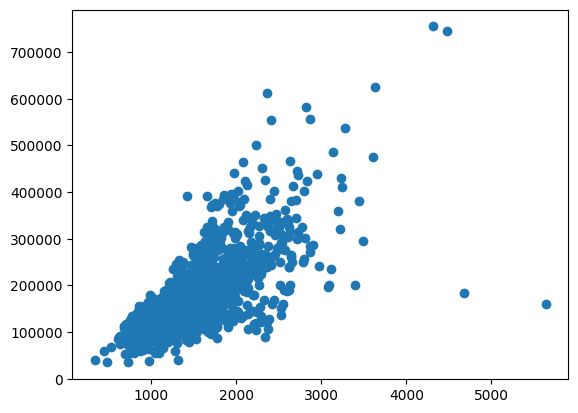

In [63]:
# 산포도(scatter())로 이상치 찾아서 제거
# 'GrLivArea', SalePrice
plt.scatter(data['GrLivArea'],data['SalePrice'])

# 이상치 확인
# 우측 아래의 3개 값은 면적은 넓은데 가격이 현저히 낮은 집
# 트렌드를 따르지 않는 값으로 이상치로 보고 분석에서 삭제
# 일반적으로 이상치를 제거하는 것은 효과적인 분석 모델을 더 잘 만들기 위해서 임
# 이상치를 그대로 두고 학습할 경우 잘못된 결과가 도출될 수 있기 때문에 삭제

In [64]:
# 삭제할 샘플(행)의 인덱스 확인
house_df.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_sc,SalePrice_log,SalePrice_log_sc
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,0,1,2008,New,Partial,160000,-0.263440,11.982935,-0.102982
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,0,10,2007,New,Partial,184750,0.048212,12.126764,0.257209


In [65]:
# 삭제할 샘플의 인덱스
del_index = house_df.sort_values(by='GrLivArea', ascending=False)[:2].index
del_index

Index([1298, 523], dtype='int64')

In [ ]:
# 이상치 삭제
house_df2

In [66]:
# 이상치 삭제
house_df2 = house_df.drop(del_index)

In [67]:
# 이상치 제거하기 전/후 데이터 크기 비교
house_df.shape
house_df2.shape

(1460, 84)

(1458, 84)

In [68]:
# 이상치를 제거하고 안 하고 결정은 도메인 지식이 있는 사람이 하게 됨
# 도메인 지식 : 값에 대해 잘 이해하는 것 
# 데이터 분석에서는 도메인 지식이 매우 중요함 
# 단수 수치만 따지는 것이 아니라 수치가 갖고 있는 의미를 살펴봐야 함 


### 로그 변환 및 환원
- 정규 분포가 아닌 결과값을 정규 분포 형태로 변환  
- 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법이 로그 변환    
- log1p() 이용해 로그 변환한 결과값을 기반으로 학습한 후  
- 예측 시 다시 결과값을 expm1()으로 환원해서 사용  
  

#### 로그 변환을 하는 이유
- 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함
- 큰 수를 작게 만들고, 복잡한 계산을 쉽게 만들고, 
- 데이터의 왜곡도를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위함

### log1p() : log() + 1   
- log(진수)
    - 진수는 양수만 가능  
    - 0에 가까운 아주 작은 양수의 경우(0.0000000..) -inf가 나옴  
    - 이런 문제를 방지하기 위해 1을 더해서 0보다 큰 양수의 값을 취함  
    - Numpy에서는 log1p()로 지원  

In [69]:
# 로그 변환 예
# 1. log() 함수 사용
n1 = np.log(10)
n1

# 로그 변환된 값을 변환 전의 원래 값으로 환원
np.expm1(n1)
# log() 함수로 로그 변환 후 환원 시 값이 다르게 환원됨

2.302585092994046

9.000000000000002

In [71]:
# 2. log1p() : log() + 1
n2 = np.log1p(10)
n2
np.expm1(n2) # 원래 값으로 환원됨

2.3978952727983707

10.000000000000002

In [ ]:
# 결론
# 로그 변환 시 np.log1p() 사용

### 카테고리 값의 인코딩 

### 카테고리 값의 문자열 변환
- 머신러닝/딥러닝 알고리즘에서 문자열 값을 입력 값으로 허용하지 않음
- 인코딩 처리하여 숫자형으로 변환


### 머신러닝의 대표적인 인코딩 방식
- 레이블 인코딩 (Label Encoding)
- 원-핫 인코딩 (One-Hot-Encoding)


### 레이블 인코딩 (Label Encoding)
- items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']  
- encoder = LabelEncoder()  
- encoder.fit(items)  
- labels = encoder.transform(items)  
- 인코딩 변환값 :  [0 1 4 5 3 3 2 2]  

--- 
레이블 인코딩 방식 주의
- 간단하게 문자열 값을 숫자형 값으로 변환하지만  
- 이는 단순 코드일 뿐 크기와는 상관 없음  
- 일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우 발생  
- 숫자 값의 크기 특성이 작용하기 때문  
- 즉, 냉장고가 1 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 가중치가 부여되거나  
- 더 중요하게 인식될 가능성 발생  
- 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에서는 적용하지 않음  
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 적용 시 문제 없음  

### 원-핫 인코딩 변환  
- 행 형태의 피처 값을 열 형태로 변화한 뒤    
- 피처 값 인덱스에 해당하는 칼럼에는 1로 표시하고   
- 나머지 칼럼에는 0으로 표시하는 방식    

원-핫 인코딩 변환 방식   
- 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  
    - LabelEncode()로 숫자 변환 후 OneHotEncoder() 수행 
- 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행 
    - pd.get_dummies()는 자동으로 object형만 원-핫 인코딩 수행  


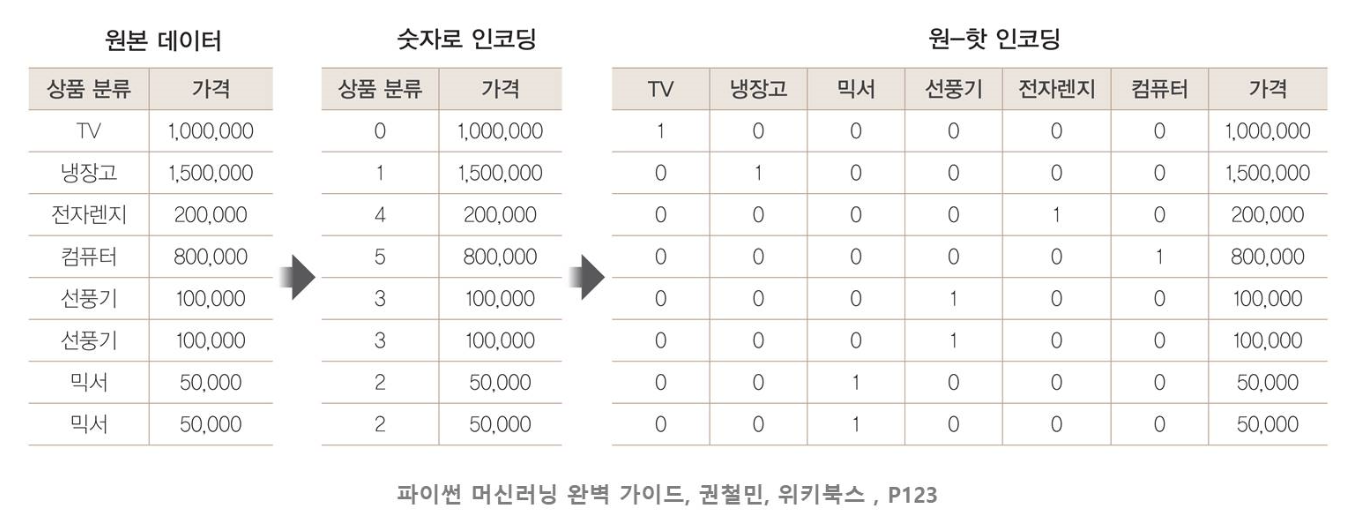

In [75]:
# 방법1 : 사이킷런의 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환  

# 원-핫 인코딩 전체 과정
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# (1) 먼저 숫자값으로 변환하기 위해 LableEncoder 사용
encoder = LabelEncoder() # LabelEncoder 클래스의 객체 생성
encoder.fit(items)
labels = encoder.transform(items)
labels

# (2) 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1, 1)
# -1 : 행 수치는 고정값으로 지정하지 않고, 열에 맞춘 다음 행 설정
# 데이터 크기에 따라 몇 행으로 할지 자동으로 처리

labels

# (3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

oh_labels

print('원-핫 인코딩 데이터 : ')
oh_labels.toarray()

oh_labels.shape

LabelEncoder()

array([0, 1, 4, 5, 3, 3, 2, 2])

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

OneHotEncoder()

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

원-핫 인코딩 데이터 : 


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

(8, 6)

In [76]:
# 방법2 : 판다스의 get_dummies()를 이용해서 원-핫 인코딩 수행  

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [78]:
# 판다스의 get_dommies() 이용해서 원-핫 인코딩 수행
pd.get_dummies(df, dtype=int)
# dtype=int 없으면 true, false로 변환됨

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
# house_df에 원-핫 인코딩 수행
# 판다스의 get_dummies() 이용

In [79]:
# 원-핫 인코딩 수행

print('원-핫 인코딩 수행 전 데이터 shape : ', house_df.shape)

# 원-핫 인코딩 수행
house_df_ohe = pd.get_dummies(house_df)
print('원-핫 인코딩 수행 전 데이터 shape : ', house_df_ohe.shape)

원-핫 인코딩 수행 전 데이터 shape :  (1460, 84)
원-핫 인코딩 수행 전 데이터 shape :  (1460, 292)


In [ ]:
# 원-핫 인코딩 수행하면 컬럼 수 증가

In [ ]:
# 원-핫 인코딩 문제점
# - 컬럼 수 증가로 필요한 공간이 커진다
# - 단어의 유사도 표현하지 못한다
# - 다중공선성 문제 발생 : 유사한 컬럼들이 증가하기 때문에

In [80]:
# 원-핫 인코딩 연습문제
# 키 값을 카테고리 값으로 변홚 후 원-핫 인코딩 수행 연습

In [81]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,169.84,64.05
1,174.80,72.10
2,170.56,61.75
3,166.80,74.85
4,176.80,64.15


In [82]:
# (1) 키 값을 등급으로 구분 : 카테고리 값으로 변환
# 174 이상 : tall
# 160 이상 174 미만  : standard
# 160 미만 : small
# df_raw['tall'] 컬럼 추가 

df_raw['tall'] = pd.cut(df_raw['height'],
                       bins=[157, 160, 174, 183],
                       labels=['small', 'standard', 'tall'])
df_raw

,height,weight,tall
0,169.84,64.05,standard
1,174.80,72.10,tall
2,170.56,61.75,standard
3,166.80,74.85,standard
4,176.80,64.15,tall
...,...,...,...
995,170.28,64.30,standard
996,172.16,67.90,standard
997,166.00,64.90,standard
998,173.76,68.50,standard


In [85]:
# (2) 카테고리 데이터의 구성비 확인
df_raw['tall'].value_counts(normalize=True)

tall
standard    0.836837
tall        0.156156
small       0.007007
Name: proportion, dtype: float64

In [87]:
# (3) 원-핫 인코딩 수행
height_onehot = pd.get_dummies(df_raw['tall'], dtype=int)
height_onehot

,small,standard,tall
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
995,0,1,0
996,0,1,0
997,0,1,0
998,0,1,0


In [88]:
# (4) 원래 데이터 + tall 컬럼 +  원-핫 인코딩된 컬럼 추가 
df_finall = pd.concat((df_raw, height_onehot), axis=1)
df_finall[:5]

,height,weight,tall,small,standard,tall
0,169.84,64.05,standard,0,1,0
1,174.80,72.10,tall,0,0,1
2,170.56,61.75,standard,0,1,0
3,166.80,74.85,standard,0,1,0
4,176.80,64.15,tall,0,0,1
